In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("HousingData.csv")

# Handle missing values (replace NaN with column mean)
data.fillna(data.mean(), inplace=True)

# Features and target
X = data.drop("MEDV", axis=1)
y = data["MEDV"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(
        n_estimators=200, random_state=42
    )
}

# Train and evaluate
results = {}

for name, model in models.items():
    if name == "Random Forest":
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)

    results[name] = {
        "MAE": mean_absolute_error(y_test, preds),
        "MSE": mean_squared_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R2": r2_score(y_test, preds)
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)


                        MAE        MSE      RMSE        R2
Linear Regression  3.149923  25.017672  5.001767  0.658852
Ridge Regression   3.148335  25.020630  5.002063  0.658812
Random Forest      2.061936   8.631941  2.938017  0.882292


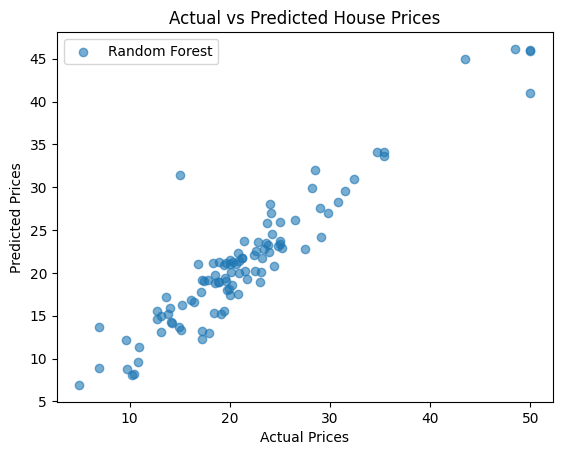

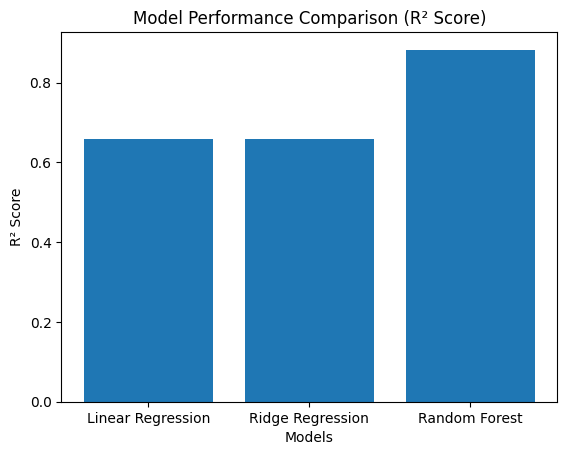

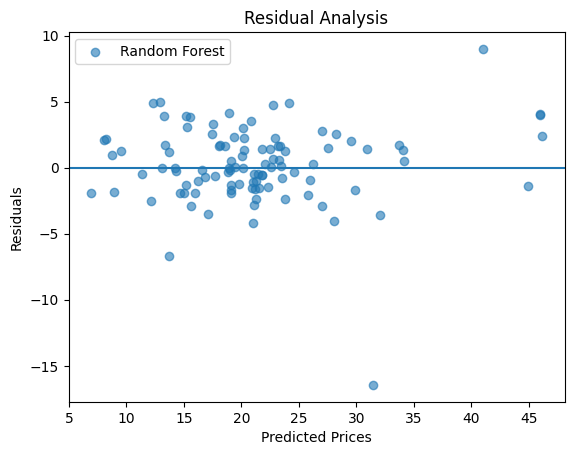

In [2]:
import matplotlib.pyplot as plt
predictions = {}
predictions[name] = preds
plt.figure()
for name, preds in predictions.items():
    plt.scatter(y_test, preds, alpha=0.6, label=name)

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()

# 2️⃣ R² Score comparison bar chart
plt.figure()
plt.bar(results_df.index, results_df["R2"])
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("Model Performance Comparison (R² Score)")
plt.show()

# 3️⃣ Residual plots
plt.figure()
for name, preds in predictions.items():
    residuals = y_test - preds
    plt.scatter(preds, residuals, alpha=0.6, label=name)

plt.axhline(y=0)
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.legend()
plt.show()